KC Ev Fiyatları

https://www.kaggle.com/datasets/shivachandel/kc-house-data adresindeki veri seti kullanılarak ev fiyatlarını tahminleyen bir model geliştirilmiştir.

In [15]:
# 1. Kütüphaneleri Yükle

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Genel Ayarlar

In [7]:
# Grafikleri ipynb dosyası içinde (burada) göstermek için
%matplotlib inline

In [9]:
pd.set_option("display.max_columns", None) #Tüm sütunalrı göster

In [19]:
# 2. Veri Setini Yükle

In [21]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5E65-6EA9

 Directory of C:\Users\Dr.Murat\Documents\ECO_Nov\ML

02.01.2025  20:34    <DIR>          .
23.12.2024  20:29    <DIR>          ..
02.01.2025  20:28    <DIR>          .ipynb_checkpoints
23.12.2024  21:29    <DIR>          __pycache__
25.12.2024  22:58         5.054.903 Adidas Zaman sErisi.ipynb
24.07.2024  10:46             1.163 adidas-quarterly-sales.csv
19.02.2024  21:11             4.063 advertising.csv
19.12.2024  12:03             2.343 all_reg_models.py
19.12.2024  23:07             1.529 allreg2.py
23.12.2024  20:56           969.768 €oklu Dogrusal Regresyon.ipynb
02.01.2025  20:34             1.801 Kc house price.ipynb
17.02.2024  08:21         2.515.206 kc_house_data.csv
18.12.2024  22:52             3.589 Pop Reg Mod Kullanma.ipynb
23.12.2024  22:12           460.127 Pop�ler regresyon Modelleri.ipynb
18.12.2024  21:21            18.684 regresyon i‡in metrikler.docx
25.12.2024  22:19            29.952 seslendir

In [23]:
df=pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [25]:
# Sütunlara ilişkin bilgilere bakmak için : https://www.kaggle.com/datasets/swathiachath/kc-housesales-data

Bu veri seti, Seattle'ı içeren King County için ev satış fiyatlarını içermektedir. Mayıs 2014 ile Mayıs 2015 arasında satılan evleri kapsar.

Basit regresyon modellerini değerlendirmek için harika bir veri setidir.

Veri Sözlüğü:
- id: Bir ev için id no
- date: Evin satıldığı tarih
- price: Fiyat, [tahmin hedefi,y]
- bedrooms: Yatak odası sayısı
- bathrooms: Banyo sayısı/yatak odası
- sqft_living: Evdeki alanın metre karecinsinden büyüklüğü
- sqft_lot: Arsanın metre kare cinsinden büyüklüğü
- floors: Evdeki toplam kat sayısı
- waterfront: Su manzaralı ev
- view: Manzara
- condition: Genel olarak evin durumu ne kadar iyi
- grade: King County derecelendirme sistemi temelinde konut birimine verilen genel derece
- sqft_above: Bodrum hariç evin metre kare cinsinden büyüklüğü
- sqft_basement: Bodrumun  metre kare cinsinden büyüklüğü
- yr_built: Yapım yılı
- yr_renovated: Restorasyon yılı
- zipcode: Posta kodu
- lat: Enlem koordinatı
- long: Boylam koordinatı
- sqft_living15: 2015 yılında oturma odası alanı (bazı yenilemeleri ima eder). Bu, arsa büyüklüğü alanını etkilemiş olabilir veya olmayabilir.
- sqft_lot15: 2015 yılında arsa büyüklüğü (bazı yenilemeleri ima eder).

In [30]:
# 3.  Keşifsel veri analizi

In [32]:
!pip install ydata_profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   --------------- ------------------------ 262.1/666.4 kB ? eta -:--:--
   ------------------------------- -------- 524.3/666.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 666.4/666.4 kB 1.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=b1e011e64a52ea0cf7d5d5b4be296423f3e6c81e720e18e2dbd889dfd81311c8
  Stored in directory: c:\users\dr.murat\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin


In [36]:
import ydata_profiling

In [37]:
profile=ydata_profiling.ProfileReport(df)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
# Outliers (Aykırı) verilerin işlenmesi

In [44]:
df_outliers_columns=df[['price', 'bedrooms', 'sqft_living', 'sqft_lot']]
outliers=df_outliers_columns.quantile(q=.99)
outliers

price          1964400.0
bedrooms             6.0
sqft_living       4978.8
sqft_lot        213008.0
Name: 0.99, dtype: float64

In [48]:
df_non_outliers=df[df['price']<outliers['price']]
df_non_outliers['price'].max()

1960000.0

In [50]:
df_non_outliers=df_non_outliers[df_non_outliers['bedrooms']<outliers['bedrooms']]
df_non_outliers['bedrooms'].max()

5

In [52]:
df_non_outliers=df_non_outliers[df_non_outliers['sqft_living']<outliers['sqft_living']]
df_non_outliers['sqft_living'].max()

4970

In [54]:
df_non_outliers=df_non_outliers[df_non_outliers['sqft_lot']<outliers['sqft_lot']]
df_non_outliers['sqft_lot'].max()

212639

In [56]:
df_non_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.077400e+04,2.077400e+04,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000,20774.000000
mean,4.617201e+09,5.099878e+05,3.311254,2.070545,2008.980841,11713.006691,1.486040,0.005247,0.204968,3.409935,7.601232,1735.473910,273.506932,1970.880235,80.795658,98078.548185,47.559825,-122.215633,1955.816213,11031.837922
std,2.876712e+09,2.753241e+05,0.827587,0.718490,802.631011,18817.739040,0.539422,0.072247,0.709782,0.650089,1.109744,750.747988,413.987609,29.334521,393.369803,53.576531,0.138872,0.140006,651.499251,19116.131084
min,1.200019e+06,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,2.141500e+09,3.190000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.469725,-122.330000,1480.000000,5060.000000
50%,3.959401e+09,4.450000e+05,3.000000,2.250000,1880.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,98065.000000,47.570900,-122.234000,1820.000000,7551.000000
75%,7.345528e+09,6.250000e+05,4.000000,2.500000,2480.000000,10305.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,530.000000,1996.000000,0.000000,98118.000000,47.678800,-122.127000,2320.000000,9900.000000
max,9.900000e+09,1.960000e+06,5.000000,5.250000,4970.000000,212639.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4930.000000,2350.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,434728.000000


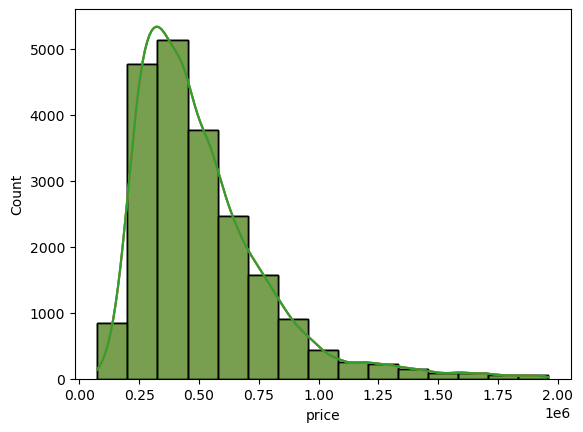

In [62]:
sns.histplot(df_non_outliers['price'],bins=15, kde=True)
plt.show()

In [64]:
df_non_outliers['zipcode'].dtype

dtype('int64')

In [66]:
df_non_outliers['zipcode']=df_non_outliers['zipcode'].astype('category')
df_non_outliers['zipcode'].dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False, categories_dtype=int64)

In [70]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  yr_renovated   20774 non-null  int64   
 16  zipcode        20774 non-null  category
 17  lat            20774 non-null  float

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

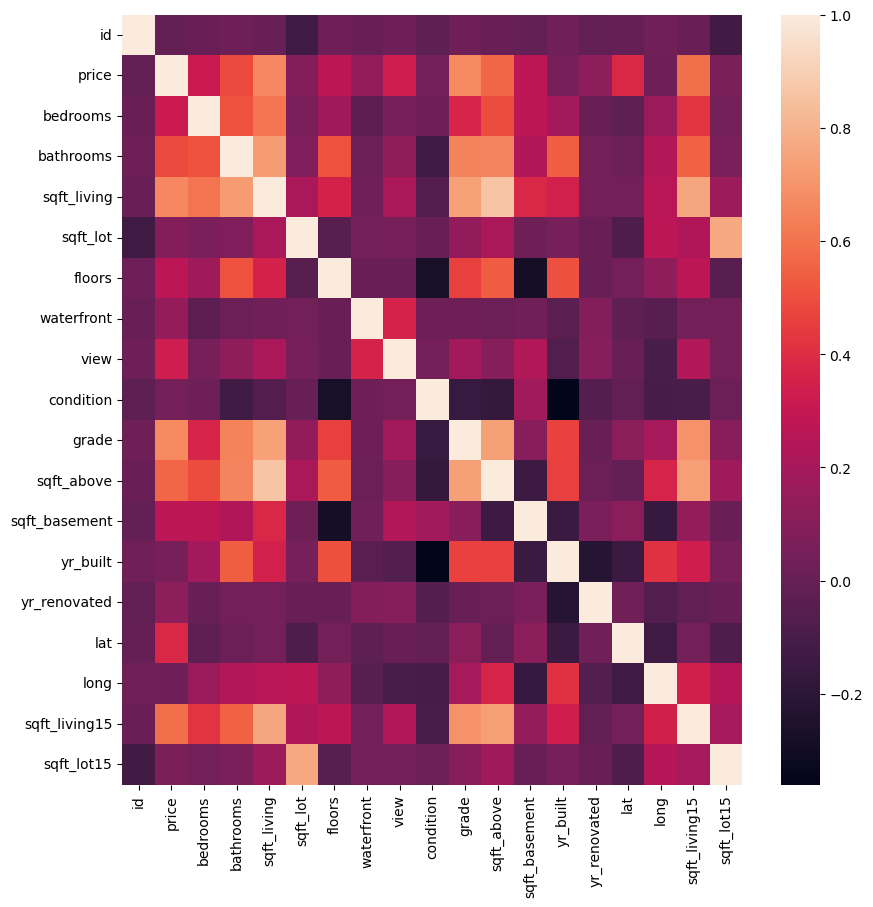

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(df_non_outliers.corr(numeric_only=True))
plt.show()

In [84]:
df_corr=df_non_outliers.corr(numeric_only=True).sort_values('price',ascending=False)['price'].head(10)

In [86]:
df_corr

price            1.000000
grade            0.665925
sqft_living      0.661235
sqft_living15    0.588437
sqft_above       0.559291
bathrooms        0.487293
lat              0.378875
view             0.335769
bedrooms         0.315142
floors           0.269345
Name: price, dtype: float64

In [88]:
df_corr[df_corr>.5]

price            1.000000
grade            0.665925
sqft_living      0.661235
sqft_living15    0.588437
sqft_above       0.559291
Name: price, dtype: float64

In [90]:
df_non_outliers['bedrooms']= df_non_outliers['bedrooms']**2
df_non_outliers['bathrooms']= df_non_outliers['bathrooms']**2
df_non_outliers['sqft_living']= df_non_outliers['sqft_living']**2

In [94]:
df_non_outliers['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 20774, dtype: int64

In [96]:
df_non_outliers['age']=2015-df_non_outliers['yr_built']

In [98]:
df_non_outliers['age']

0        60
1        64
2        82
3        50
4        28
         ..
21608     6
21609     1
21610     6
21611    11
21612     7
Name: age, Length: 20774, dtype: int64

In [100]:
df_non_outliers['age'].max()

115

In [102]:
df_non_outliers[df_non_outliers['age']==df_non_outliers['age'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
14,1175000570,20150312T000000,530000.0,25,4.0000,3276100,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,115
115,3626039325,20141121T000000,740500.0,9,12.2500,19184400,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,115
498,9274202270,20140818T000000,625000.0,4,2.2500,2220100,5750,1.5,0,0,4,7,1190,300,1900,0,98116,47.5872,-122.390,1590,4025,115
537,5694500105,20141204T000000,595000.0,4,4.0000,2280100,4000,1.0,0,0,4,7,1010,500,1900,0,98103,47.6582,-122.345,1920,4000,115
703,7011200260,20141219T000000,485000.0,16,4.0000,1960000,3600,1.0,0,0,3,7,1100,300,1900,0,98119,47.6385,-122.370,1630,2048,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19063,1702901340,20140613T000000,718500.0,9,4.0000,8468100,6600,2.0,0,0,4,7,1920,990,1900,1988,98118,47.5576,-122.281,1370,5500,115
19137,3388110230,20140729T000000,179000.0,16,3.0625,3204100,7175,1.5,0,0,3,6,1410,380,1900,0,98168,47.4963,-122.318,1790,8417,115
19319,4083302225,20141014T000000,850000.0,16,9.0000,6502500,3784,1.5,0,0,4,8,1750,800,1900,0,98103,47.6559,-122.338,2100,4560,115
19385,2420069042,20150424T000000,240000.0,9,4.0000,2411809,6550,1.0,0,0,3,7,1553,0,1900,2001,98022,47.2056,-121.994,1010,10546,115


In [106]:
df_non_outliers['renovated']=np.where(df_non_outliers['yr_renovated']==0,0,1)

In [108]:
df_non_outliers['renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: renovated, Length: 20774, dtype: int32

In [110]:
df_non_outliers.drop('yr_renovated',axis=1,inplace=True)

In [112]:
df_non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20774 non-null  int64   
 1   date           20774 non-null  object  
 2   price          20774 non-null  float64 
 3   bedrooms       20774 non-null  int64   
 4   bathrooms      20774 non-null  float64 
 5   sqft_living    20774 non-null  int64   
 6   sqft_lot       20774 non-null  int64   
 7   floors         20774 non-null  float64 
 8   waterfront     20774 non-null  int64   
 9   view           20774 non-null  int64   
 10  condition      20774 non-null  int64   
 11  grade          20774 non-null  int64   
 12  sqft_above     20774 non-null  int64   
 13  sqft_basement  20774 non-null  int64   
 14  yr_built       20774 non-null  int64   
 15  zipcode        20774 non-null  category
 16  lat            20774 non-null  float64 
 17  long           20774 non-null  float

In [114]:
df_non_outliers['sqft_basement']=np.where(df_non_outliers['sqft_basement']==0,0,1)
df_non_outliers['sqft_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: sqft_basement, Length: 20774, dtype: int32

In [116]:
# özellikleri ve hedefi belirle
X=df_non_outliers.drop(['id','price','date','lat','long'],axis=1)
y=df_non_outliers['price']

In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       20774 non-null  int64   
 1   bathrooms      20774 non-null  float64 
 2   sqft_living    20774 non-null  int64   
 3   sqft_lot       20774 non-null  int64   
 4   floors         20774 non-null  float64 
 5   waterfront     20774 non-null  int64   
 6   view           20774 non-null  int64   
 7   condition      20774 non-null  int64   
 8   grade          20774 non-null  int64   
 9   sqft_above     20774 non-null  int64   
 10  sqft_basement  20774 non-null  int32   
 11  yr_built       20774 non-null  int64   
 12  zipcode        20774 non-null  category
 13  sqft_living15  20774 non-null  int64   
 14  sqft_lot15     20774 non-null  int64   
 15  age            20774 non-null  int64   
 16  renovated      20774 non-null  int32   
dtypes: category(1), float64(2), int32(2)

In [122]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 20774, dtype: float64

In [124]:
# kategorik değişkeni OHE ile sayıya çevir
X=pd.get_dummies(X, columns=['zipcode'], drop_first=True)

In [126]:
# Ölçeklendirme
from sklearn.preprocessing import StandardScaler

In [132]:
scaler=StandardScaler()

In [134]:
X_scaler=scaler.fit_transform(X)

In [136]:
X_scaler

array([[-0.47618425, -1.21272135, -0.86005547, ..., -0.07996705,
        -0.11646296, -0.12247349],
       [-0.47618425,  0.08262816,  0.50348653, ..., -0.07996705,
        -0.11646296, -0.12247349],
       [-1.37489161, -1.21272135, -1.06919731, ..., -0.07996705,
        -0.11646296, -0.12247349],
       ...,
       [-1.37489161, -1.35222052, -0.95213543, ..., -0.07996705,
        -0.11646296, -0.12247349],
       [-0.47618425,  0.46126879, -0.55462206, ..., -0.07996705,
        -0.11646296, -0.12247349],
       [-1.37489161, -1.35222052, -0.95213543, ..., -0.07996705,
        -0.11646296, -0.12247349]])

In [140]:
#  X,y Eğitim ve test seti olarak ayır,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split (X_scaler, y, test_size=.2, random_state=42)

In [ ]:
# 4. Model Oluştur

In [166]:
from all_reg_models import all_reg_models
all_reg_models(X_train,X_test,y_train, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454
Linear Regression: Average RMSE: 112405.13
Linear Regression: R2: 0.83
Decision Tree: Average RMSE: 161755.95
Decision Tree: R2: 0.65
Random Forest: Average RMSE: 117397.64
Random Forest: R2: 0.81
Gradient Boosting: Average RMSE: 128567.16
Gradient Boosting: R2: 0.78
XGBoost: Average RMSE: 105697.58
XGBoost: R2: 0.85
LightGBM: Average RMSE: 104442.25
LightGBM: R2: 0.85
Ridge: Average RMSE: 112405.01
Ridge: R2: 0.83
Lasso: Average RMSE: 112405.37
Lasso: R2: 0.83
ElasticNet: Average RMSE: 126029.45
ElasticNet: R2: 0.79
KNeighborsRegressor: Average RMSE: 113990.72
KNeighborsRegressor: R2: 0.83
SVR: Average RMSE: 279652.32
SVR: R2: -0.05
MLPRegresso

In [148]:
from lightgbm import LGBMRegressor

In [152]:
from sklearn.metrics import r2_score,mean_squared_error

In [154]:
lgbm_model=LGBMRegressor()

In [172]:
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1784
[LightGBM] [Info] Number of data points in the train set: 16619, number of used features: 85
[LightGBM] [Info] Start training from score 510645.277454


LGBMRegressor()

In [174]:
# Modeli Değerlendir

In [ ]:
y_pred=lgbm_model.predict(X_test)
rkare=r2_score(y_pred,y_test)
print("R 2 Skor:", rkare)

In [170]:
print("RMSE:",mean_squared_error(y_pred,y_test)**.5)


RMSE: 104442.25299579177


In [178]:
# Katsayılar ve özellikler

In [180]:
columns=X.columns
df_importance=pd.DataFrame({'Feature': columns,
                           "Importance":lgbm_model.feature_importances_})

In [182]:
df_importance

,Feature,Importance
0,bedrooms,25
1,bathrooms,51
2,sqft_living,206
3,sqft_lot,160
4,floors,21
...,...,...
80,zipcode_98177,18
81,zipcode_98178,16
82,zipcode_98188,12
83,zipcode_98198,18


In [184]:
df_importance.sort_values(by='Importance',ascending=False).head(10)

,Feature,Importance
11,yr_built,280
2,sqft_living,206
12,sqft_living15,193
13,sqft_lot15,161
3,sqft_lot,160
8,grade,155
9,sqft_above,119
18,zipcode_98004,84
6,view,84
40,zipcode_98040,63


In [186]:
# Deploy Model işe yarıyorsa ürün olarak kullanılabilir